In [ ]:
options(scipen=100, digits=3)

In [18]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          5.1                         
year           2018                        
month          07                          
day            02                          
svn rev        74947                       
language       R                           
version.string R version 3.5.1 (2018-07-02)
nickname       Feather Spray               

In [19]:
eigenvec <- read.table("Tiwi_1kg_andaman_pca_1.eigenvec", header = FALSE, skip=0, sep = " ")

In [20]:
rownames(eigenvec) <- eigenvec[,2]

In [21]:
eigenvec <- eigenvec[,3:ncol(eigenvec)]

In [22]:
colnames(eigenvec) <- paste("Principal Component ", c(1:20), sep = "")

In [23]:
PED <- read.table("pca_popmap_1kg_tiwi175", skip = 0, sep = "\t")

In [24]:
PED <- PED[which(PED$V1 %in% rownames(eigenvec)), ]

In [25]:
PED <- PED[match(rownames(eigenvec), PED$V1),]

In [26]:
all(PED$V1 == rownames(eigenvec)) == TRUE

[1] TRUE

In [27]:
require("RColorBrewer")

In [28]:
PED$V2 <- factor(PED$V2, levels=c(
  "ACB","ASW","ESN","GWD","LWK","MSL","YRI",
  "CLM","MXL","PEL","PUR",
  "CDX","CHB","CHS","JPT","KHV",
  "CEU","FIN","GBR","IBS","TSI",
  "BEB","GIH","ITU","PJL","STU",
  "TIWI",
  "Andamanese"))

In [29]:
col <- colorRampPalette(c(
    '#E41A1C','#E41A1C','#E41A1C','#E41A1C','#E41A1C','#E41A1C','#E41A1C',
    '#377EB8','#377EB8','#377EB8','#377EB8',
    '#4DAF4A','#4DAF4A','#4DAF4A','#4DAF4A','#4DAF4A',
    '#984EA3','#984EA3','#984EA3','#984EA3','#984EA3',
    '#FF7F00','#FF7F00','#FF7F00','#FF7F00','#FF7F00',
    '#A65628',
    '#FFFF33'))(length(unique(PED$V2)))[factor(PED$V2)]

[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33" "#A65628"
[8] "#F781BF" "#999999"

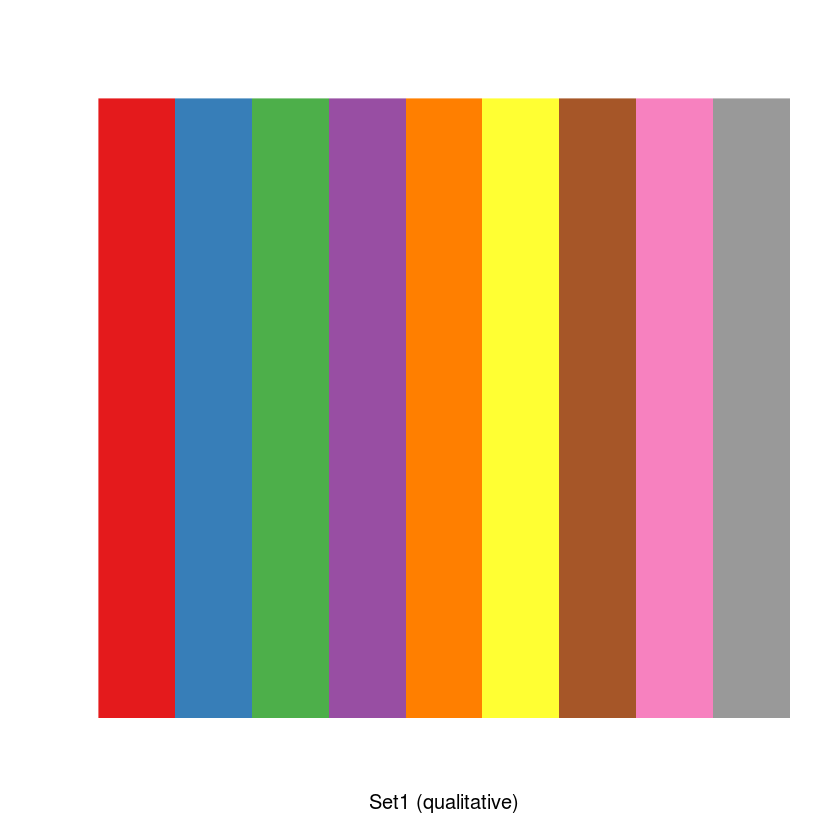

In [30]:
brewer.pal(n = 9, name = 'Set1')
display.brewer.pal(n = 9, name = 'Set1')

In [31]:
project.pca <- eigenvec

In [32]:
jpeg("rplot1kg_final.jpg",width=1800,height=1000) 
par(mar=c(5,5,5,5), cex=2.0, cex.main=7, cex.axis=2.75, cex.lab=2.75, mfrow=c(1,2))

plot(project.pca[,1], project.pca[,2], type="n", main="A", adj=0.5, xlab="First component", ylab="Second component", font=2, font.lab=2)
points(project.pca[,1], project.pca[,2], col=col, pch=20, cex=3.25)
legend("bottomleft", bty="n", cex=1.5, title="", c("African","Hispanic","East-Asian","Caucasian","South Asian","Tiwi","Andamanese"), fill=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00','#FFFF33','#A65628','#F781BF','#999999'))

plot(project.pca[,1], project.pca[,3], type="n", main="B", adj=0.5, xlab="First component", ylab="Third component", font=2, font.lab=2)
points(project.pca[,1], project.pca[,3], col=col, pch=20, cex=3.25)
dev.off()

png 
  2